In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import re
%matplotlib inline

C:\Users\mshiv\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\mshiv\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
df=pd.read_csv(r"E:\Data Science Projects\Project Files\Fitness Tracker E commerce Product\archive\smartwatches.csv")

In [3]:
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(450, 16)

In [6]:
train_df=df.sample(frac=0.8, random_state=0).reset_index()

In [7]:
train_df

index  Unnamed: 0    Brand  Current Price  Original Price  \
0      124         124    apple        23349.0         23900.0   
1       54          54   garmin            NaN             NaN   
2      268         268   garmin        20490.0             NaN   
3      293         293   huawei         6990.0         14990.0   
4      230         230   fitbit        16999.0             NaN   
..     ...         ...      ...            ...             ...   
355    207         207  samsung        16999.0         28490.0   
356    279         279   garmin        39490.0         44990.0   
357    227         227   fitbit        26499.0             NaN   
358    148         148    noise         1999.0          5999.0   
359    143         143    apple        41900.0             NaN   

     Discount Percentage  Rating  Number OF Ratings  \
0               2.305439     4.6            55800.0   
1                    NaN     3.7                6.0   
2                    NaN     5.0                3.0   
3              53.368913     4.3              119.0   
4                    NaN     4.2              426.0   
..                   ...     ...                ...   
355            40.333450     4.1             1980.0   
356            12.224939     4.7              109.0   
357                  NaN     4.1              367.0   
358            66.677780     4.2            80483.0   
359                  NaN     4.6             2847.0   

                                            Model Name Dial Shape Strap Color  \
0    Watch Series 3 (GPS, 42mm) - Space Grey Alumin...  Rectangle       Black   
1                                                  NaN        NaN         NaN   
2                                      Vivomove Sports     Circle       Brown   
3                                            Watch Fit  Rectangle        Pink   
4                                   Versa Lite Edition     Square      Purple   
..                                                 ...        ...         ...   
355                Galaxy Watch Active 2 Aluminium LTE     Circle        Grey   
356  Instinct 2, Rugged Outdoor Watch with GPS, Bui...     Circle        Grey   
357                                              Ionic     Square        Grey   
358  ColorFit Icon 2 1.8 Display, Bluetooth Calling...  Rectangle       Black   
359  Watch Series7 (GPS, 41mm) - Blue Aluminium Cas...  Rectangle        Blue   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0          Silicon         Yes                 22.0       Yes   1.7 inches   
1              NaN         Yes                 22.0       Yes  35.9 inches   
2          Silicon          No                  3.5       Yes  18.5 inches   
3          Silicon         Yes                 22.0       Yes   4.2 inches   
4          Silicon         Yes                  3.5       Yes   1.0 inches   
..             ...         ...                  ...       ...          ...   
355        Silicon         Yes                  3.5       Yes   1.4 inches   
356        Silicon          No                 17.5       Yes   0.9 inches   
357         Rubber         Yes                 17.5       Yes   1.3 inches   
358        Silicon         Yes                 22.0       Yes   1.8 inches   
359      Aluminium         Yes                 22.0       Yes   1.6 inches   

        Weight  
0          NaN  
1    35 - 50 g  
2          NaN  
3      <= 20 g  
4    20 - 35 g  
..         ...  
355    <= 20 g  
356        NaN  
357        NaN  
358        NaN  
359    <= 20 g  

[360 rows x 17 columns]

In [8]:
train_df.shape

(360, 17)

In [9]:
test_df=df.drop(train_df.index).reset_index()

In [10]:
test_df

index  Unnamed: 0       Brand  Current Price  Original Price  \
0     360         360     ambrane         1499.0          3799.0   
1     361         361      pebble         2799.0          7499.0   
2     362         362      pebble         4199.0          9499.0   
3     363         363      pebble         4199.0          9999.0   
4     364         364      pebble         1999.0          4999.0   
..    ...         ...         ...            ...             ...   
85    445         445  fire-boltt         5999.0          8999.0   
86    446         446  fire-boltt         3700.0          9999.0   
87    447         447  fire-boltt         5999.0          8999.0   
88    448         448  fire-boltt         3200.0          7999.0   
89    449         449  fire-boltt         3000.0          7999.0   

    Discount Percentage  Rating  Number OF Ratings  \
0             60.542248     4.2             1804.0   
1             62.675023     4.4            12644.0   
2             55.795347     4.2             7828.0   
3             58.005801     4.2              541.0   
4             60.012002     4.0             4240.0   
..                  ...     ...                ...   
85            33.337037     2.5                NaN   
86            62.996300     NaN                NaN   
87            33.337037     2.5                NaN   
88            59.994999     NaN                NaN   
89            62.495312     NaN                NaN   

                                           Model Name Dial Shape Strap Color  \
0                                                Flex     Square       Green   
1   Cosmos Ultra 1.91" 600 nits BT-Calling High-Re...  Rectangle       Black   
2   Cosmos luxe 1.36" AMOLED Always-on Display Blu...     Circle    Charcoal   
3   Cosmos Luxe 2.0 1.43" AMOLED Display with BT C...     Circle    Midnight   
4   Frost 1.87'' BT Calling with 2.5D Curved HD Di...  Rectangle        Blue   
..                                                ...        ...         ...   
85                                             bsw003     Circle        Grey   
86                                          beast pro     Square       Black   
87                                             bsw003     Circle        Gold   
88                                             call 2     Square        Blue   
89                                             call 2     Square       Black   

   Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0         Silicon         Yes                 22.0       Yes   1.7 inches   
1         Silicon         Yes                 22.0       Yes   1.9 inches   
2         Silicon         Yes                 22.0       Yes   0.1 inches   
3         Silicon         Yes                 22.0       Yes   1.4 inches   
4         Silicon         Yes                  3.5       Yes  20.0 inches   
..            ...         ...                  ...       ...          ...   
85        Silicon         Yes                 22.0       Yes   1.3 inches   
86        Silicon         Yes                  8.0       Yes   0.1 inches   
87        Silicon         Yes                 22.0       Yes   1.3 inches   
88        Silicon         Yes                 22.0       Yes   0.1 inches   
89        Silicon         Yes                 22.0       Yes   0.1 inches   

       Weight  
0         NaN  
1       75g +  
2         NaN  
3   20 - 35 g  
4   20 - 35 g  
..        ...  
85        NaN  
86        NaN  
87        NaN  
88        NaN  
89        NaN  

[90 rows x 17 columns]

In [11]:
print(train_df.shape,test_df.shape)

(360, 17) (90, 17)


In [12]:
train_df.tail()

index  Unnamed: 0    Brand  Current Price  Original Price  \
355    207         207  samsung        16999.0         28490.0   
356    279         279   garmin        39490.0         44990.0   
357    227         227   fitbit        26499.0             NaN   
358    148         148    noise         1999.0          5999.0   
359    143         143    apple        41900.0             NaN   

     Discount Percentage  Rating  Number OF Ratings  \
355            40.333450     4.1             1980.0   
356            12.224939     4.7              109.0   
357                  NaN     4.1              367.0   
358            66.677780     4.2            80483.0   
359                  NaN     4.6             2847.0   

                                            Model Name Dial Shape Strap Color  \
355                Galaxy Watch Active 2 Aluminium LTE     Circle        Grey   
356  Instinct 2, Rugged Outdoor Watch with GPS, Bui...     Circle        Grey   
357                                              Ionic     Square        Grey   
358  ColorFit Icon 2 1.8 Display, Bluetooth Calling...  Rectangle       Black   
359  Watch Series7 (GPS, 41mm) - Blue Aluminium Cas...  Rectangle        Blue   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
355        Silicon         Yes                  3.5       Yes   1.4 inches   
356        Silicon          No                 17.5       Yes   0.9 inches   
357         Rubber         Yes                 17.5       Yes   1.3 inches   
358        Silicon         Yes                 22.0       Yes   1.8 inches   
359      Aluminium         Yes                 22.0       Yes   1.6 inches   

      Weight  
355  <= 20 g  
356      NaN  
357      NaN  
358      NaN  
359  <= 20 g

In [13]:
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [14]:
train_df.isnull().sum().sort_values()

index                    0
Unnamed: 0               0
Brand                    0
Rating                   4
Bluetooth                5
Current Price            9
Display Size            23
Battery Life (Days)     27
Touchscreen             31
Model Name              31
Number OF Ratings       48
Strap Material          57
Discount Percentage     65
Original Price          65
Strap Color             99
Dial Shape              99
Weight                 154
dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        351 non-null    float64
 4   Original Price       295 non-null    float64
 5   Discount Percentage  295 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    312 non-null    float64
 8   Model Name           329 non-null    object 
 9   Dial Shape           261 non-null    object 
 10  Strap Color          261 non-null    object 
 11  Strap Material       303 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  333 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         337 non-null    obj

In [16]:
num_data=[features for features in train_df.columns if train_df[features].dtypes!=object]

In [17]:
cont_data=[features for features in train_df.columns if train_df[features].dtypes==object]

In [18]:
num_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [19]:
cont_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [20]:
train_df[num_data].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  360.000000  360.000000     351.000000      295.000000   
mean   222.508333  222.508333   12523.783476    14430.728814   
std    130.277527  130.277527   16740.677804    15321.599711   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    109.750000  109.750000    2126.000000     5999.000000   
50%    223.500000  223.500000    3999.000000     7999.000000   
75%    333.000000  333.000000   17995.000000    17997.000000   
max    449.000000  449.000000   98990.000000    93990.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           295.000000  356.000000         312.000000           333.000000  
mean             48.682999    4.032865       10217.403846            13.889189  
std              24.184116    0.537248       27856.422165             7.758593  
min             -79.688436    2.000000           1.000000             0.750000  
25%              33.428041    3.800000          69.750000             8.000000  
50%              55.013753    4.100000        1016.000000            17.500000  
75%              66.677780    4.300000        6133.750000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [21]:
train_df[num_data].corr()

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.075694       -0.061304   
Unnamed: 0           1.000000    1.000000      -0.075694       -0.061304   
Current Price       -0.075694   -0.075694       1.000000        0.970232   
Original Price      -0.061304   -0.061304       0.970232        1.000000   
Discount Percentage -0.104107   -0.104107      -0.607297       -0.490842   
Rating              -0.272099   -0.272099       0.389604        0.310886   
Number OF Ratings   -0.173719   -0.173719      -0.178360       -0.162661   
Battery Life (Days)  0.286597    0.286597       0.040494       -0.106366   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.104107 -0.272099          -0.173719   
Unnamed: 0                     -0.104107 -0.272099          -0.173719   
Current Price                  -0.607297  0.389604          -0.178360   
Original Price                 -0.490842  0.310886          -0.162661   
Discount Percentage             1.000000 -0.196151           0.221370   
Rating                         -0.196151  1.000000           0.073783   
Number OF Ratings               0.221370  0.073783           1.000000   
Battery Life (Days)            -0.007768 -0.079620           0.031485   

                     Battery Life (Days)  
index                           0.286597  
Unnamed: 0                      0.286597  
Current Price                   0.040494  
Original Price                 -0.106366  
Discount Percentage            -0.007768  
Rating                         -0.079620  
Number OF Ratings               0.031485  
Battery Life (Days)             1.000000

In [22]:
train_df[num_data].skew()

index                  0.006449
Unnamed: 0             0.006449
Current Price          2.397316
Original Price         2.755372
Discount Percentage   -1.068296
Rating                -1.356013
Number OF Ratings      5.667901
Battery Life (Days)   -0.136293
dtype: float64

In [23]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
num_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [25]:
num_data.remove('index')


In [26]:
num_data.remove('Unnamed: 0')

In [27]:
num_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

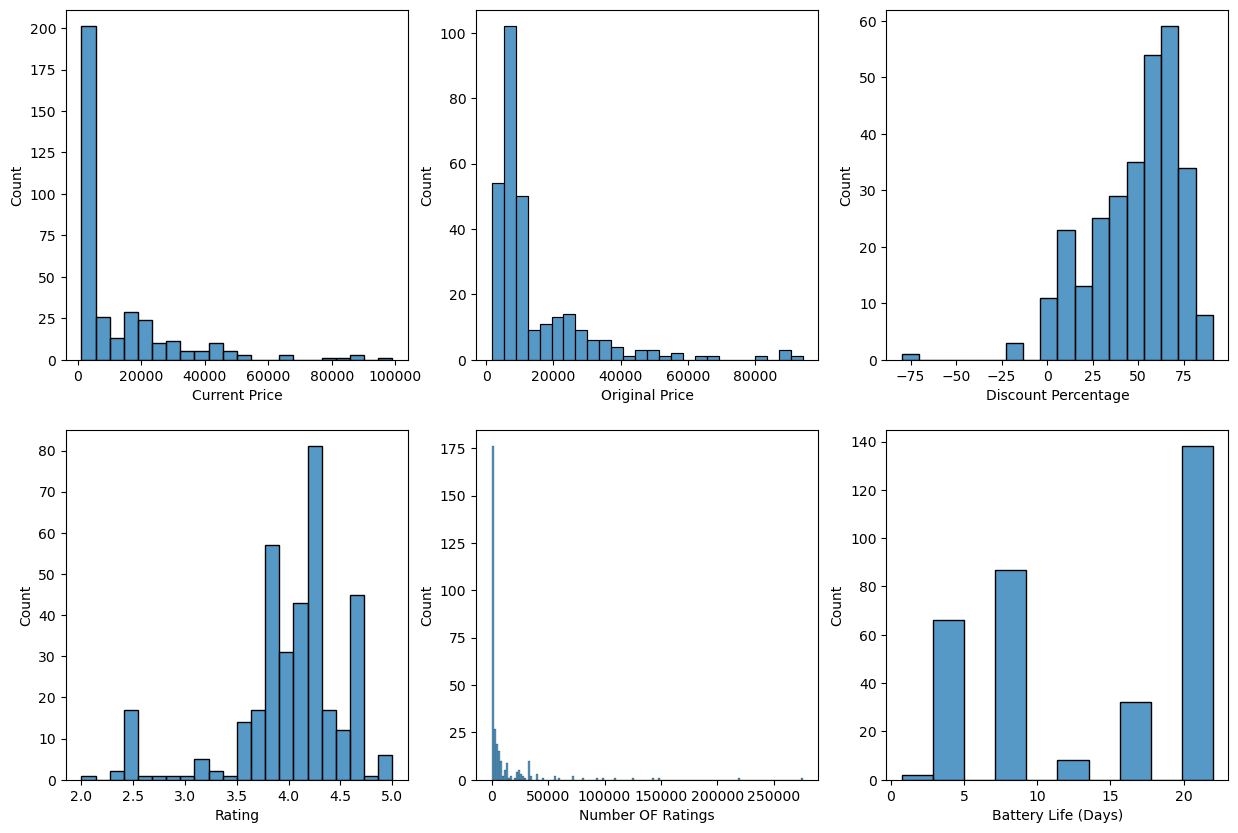

In [28]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.histplot(data=train_df,x=col)
plt.show()

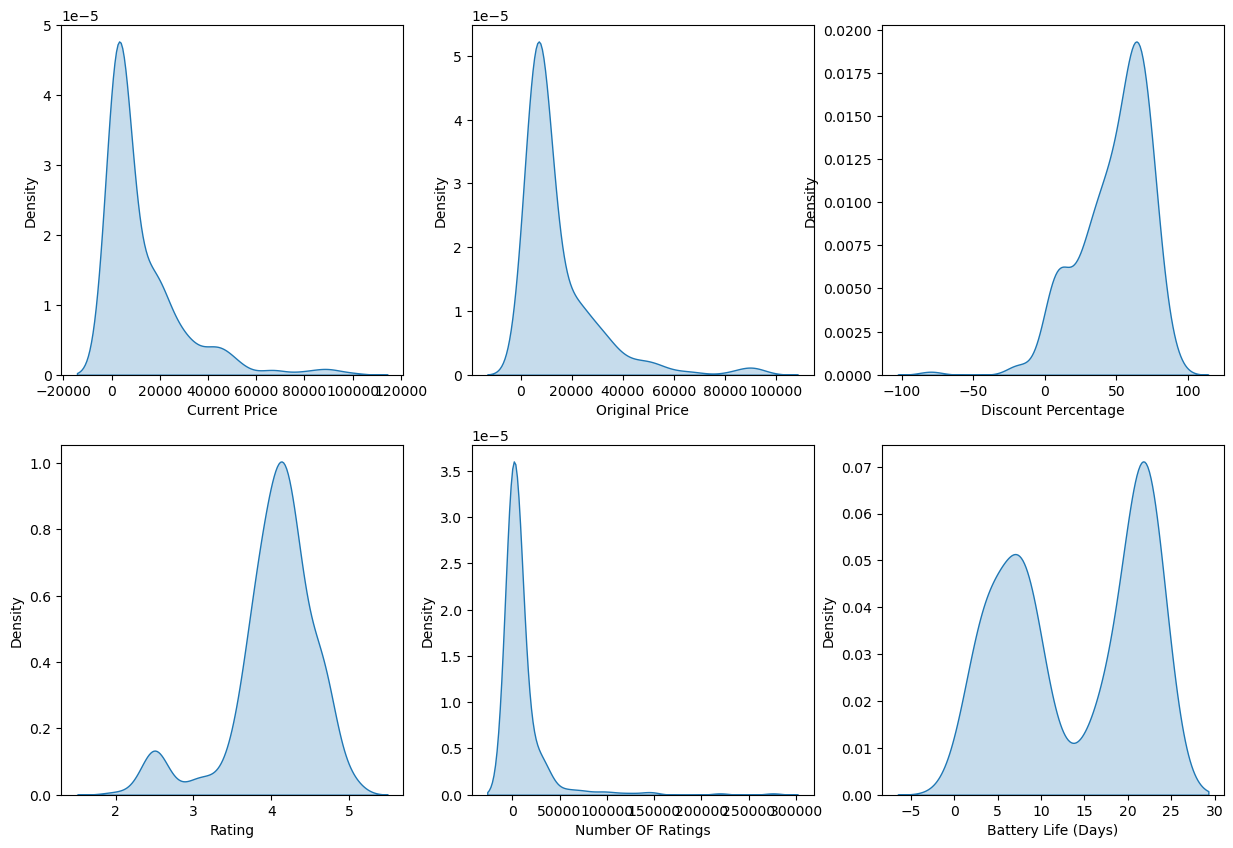

In [29]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=train_df,x=col,fill=True)
plt.show()

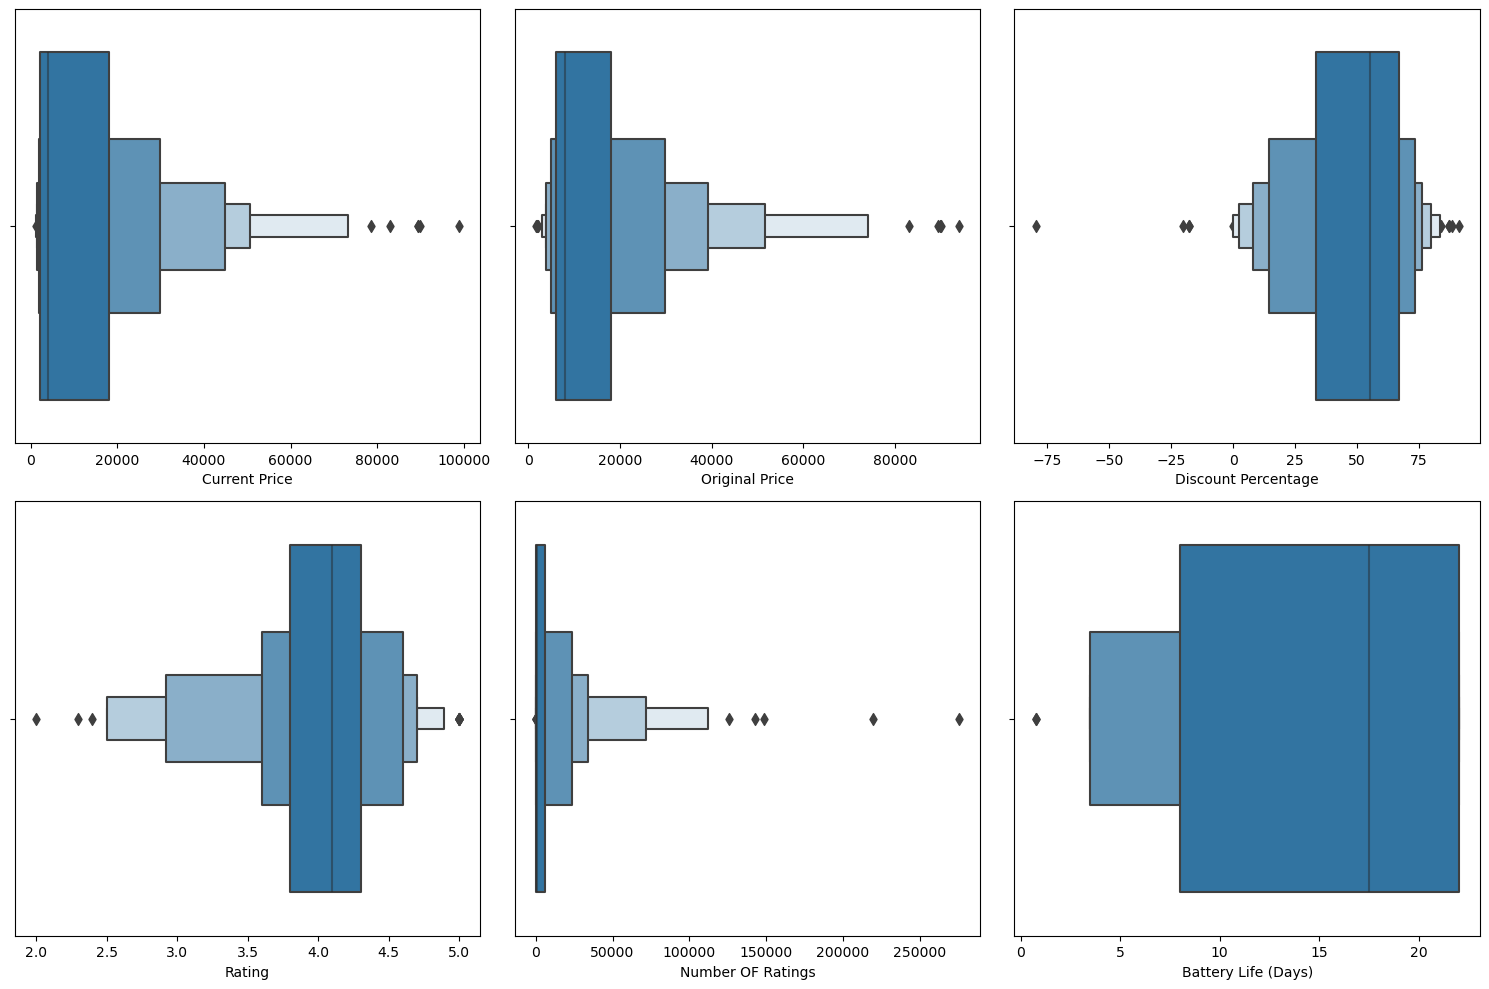

In [30]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxenplot(data=train_df,x=col)
plt.tight_layout()
plt.show()

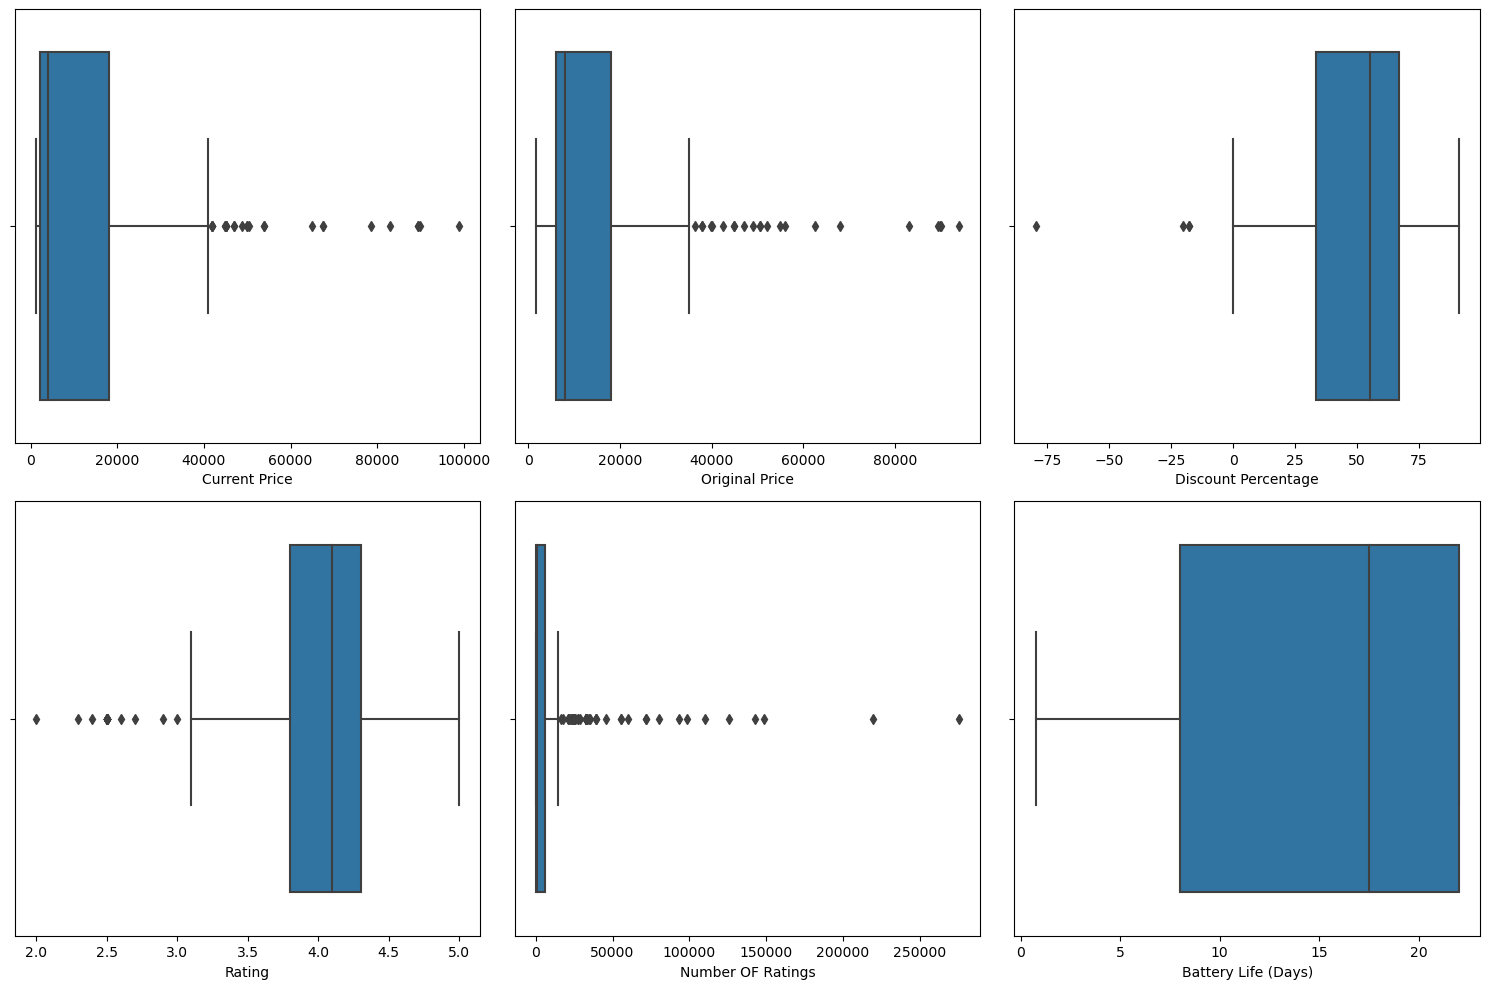

In [31]:
plt.figure(figsize=(15,10))


for i , col in enumerate(num_data):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=train_df,x=col)
plt.tight_layout()
plt.show()

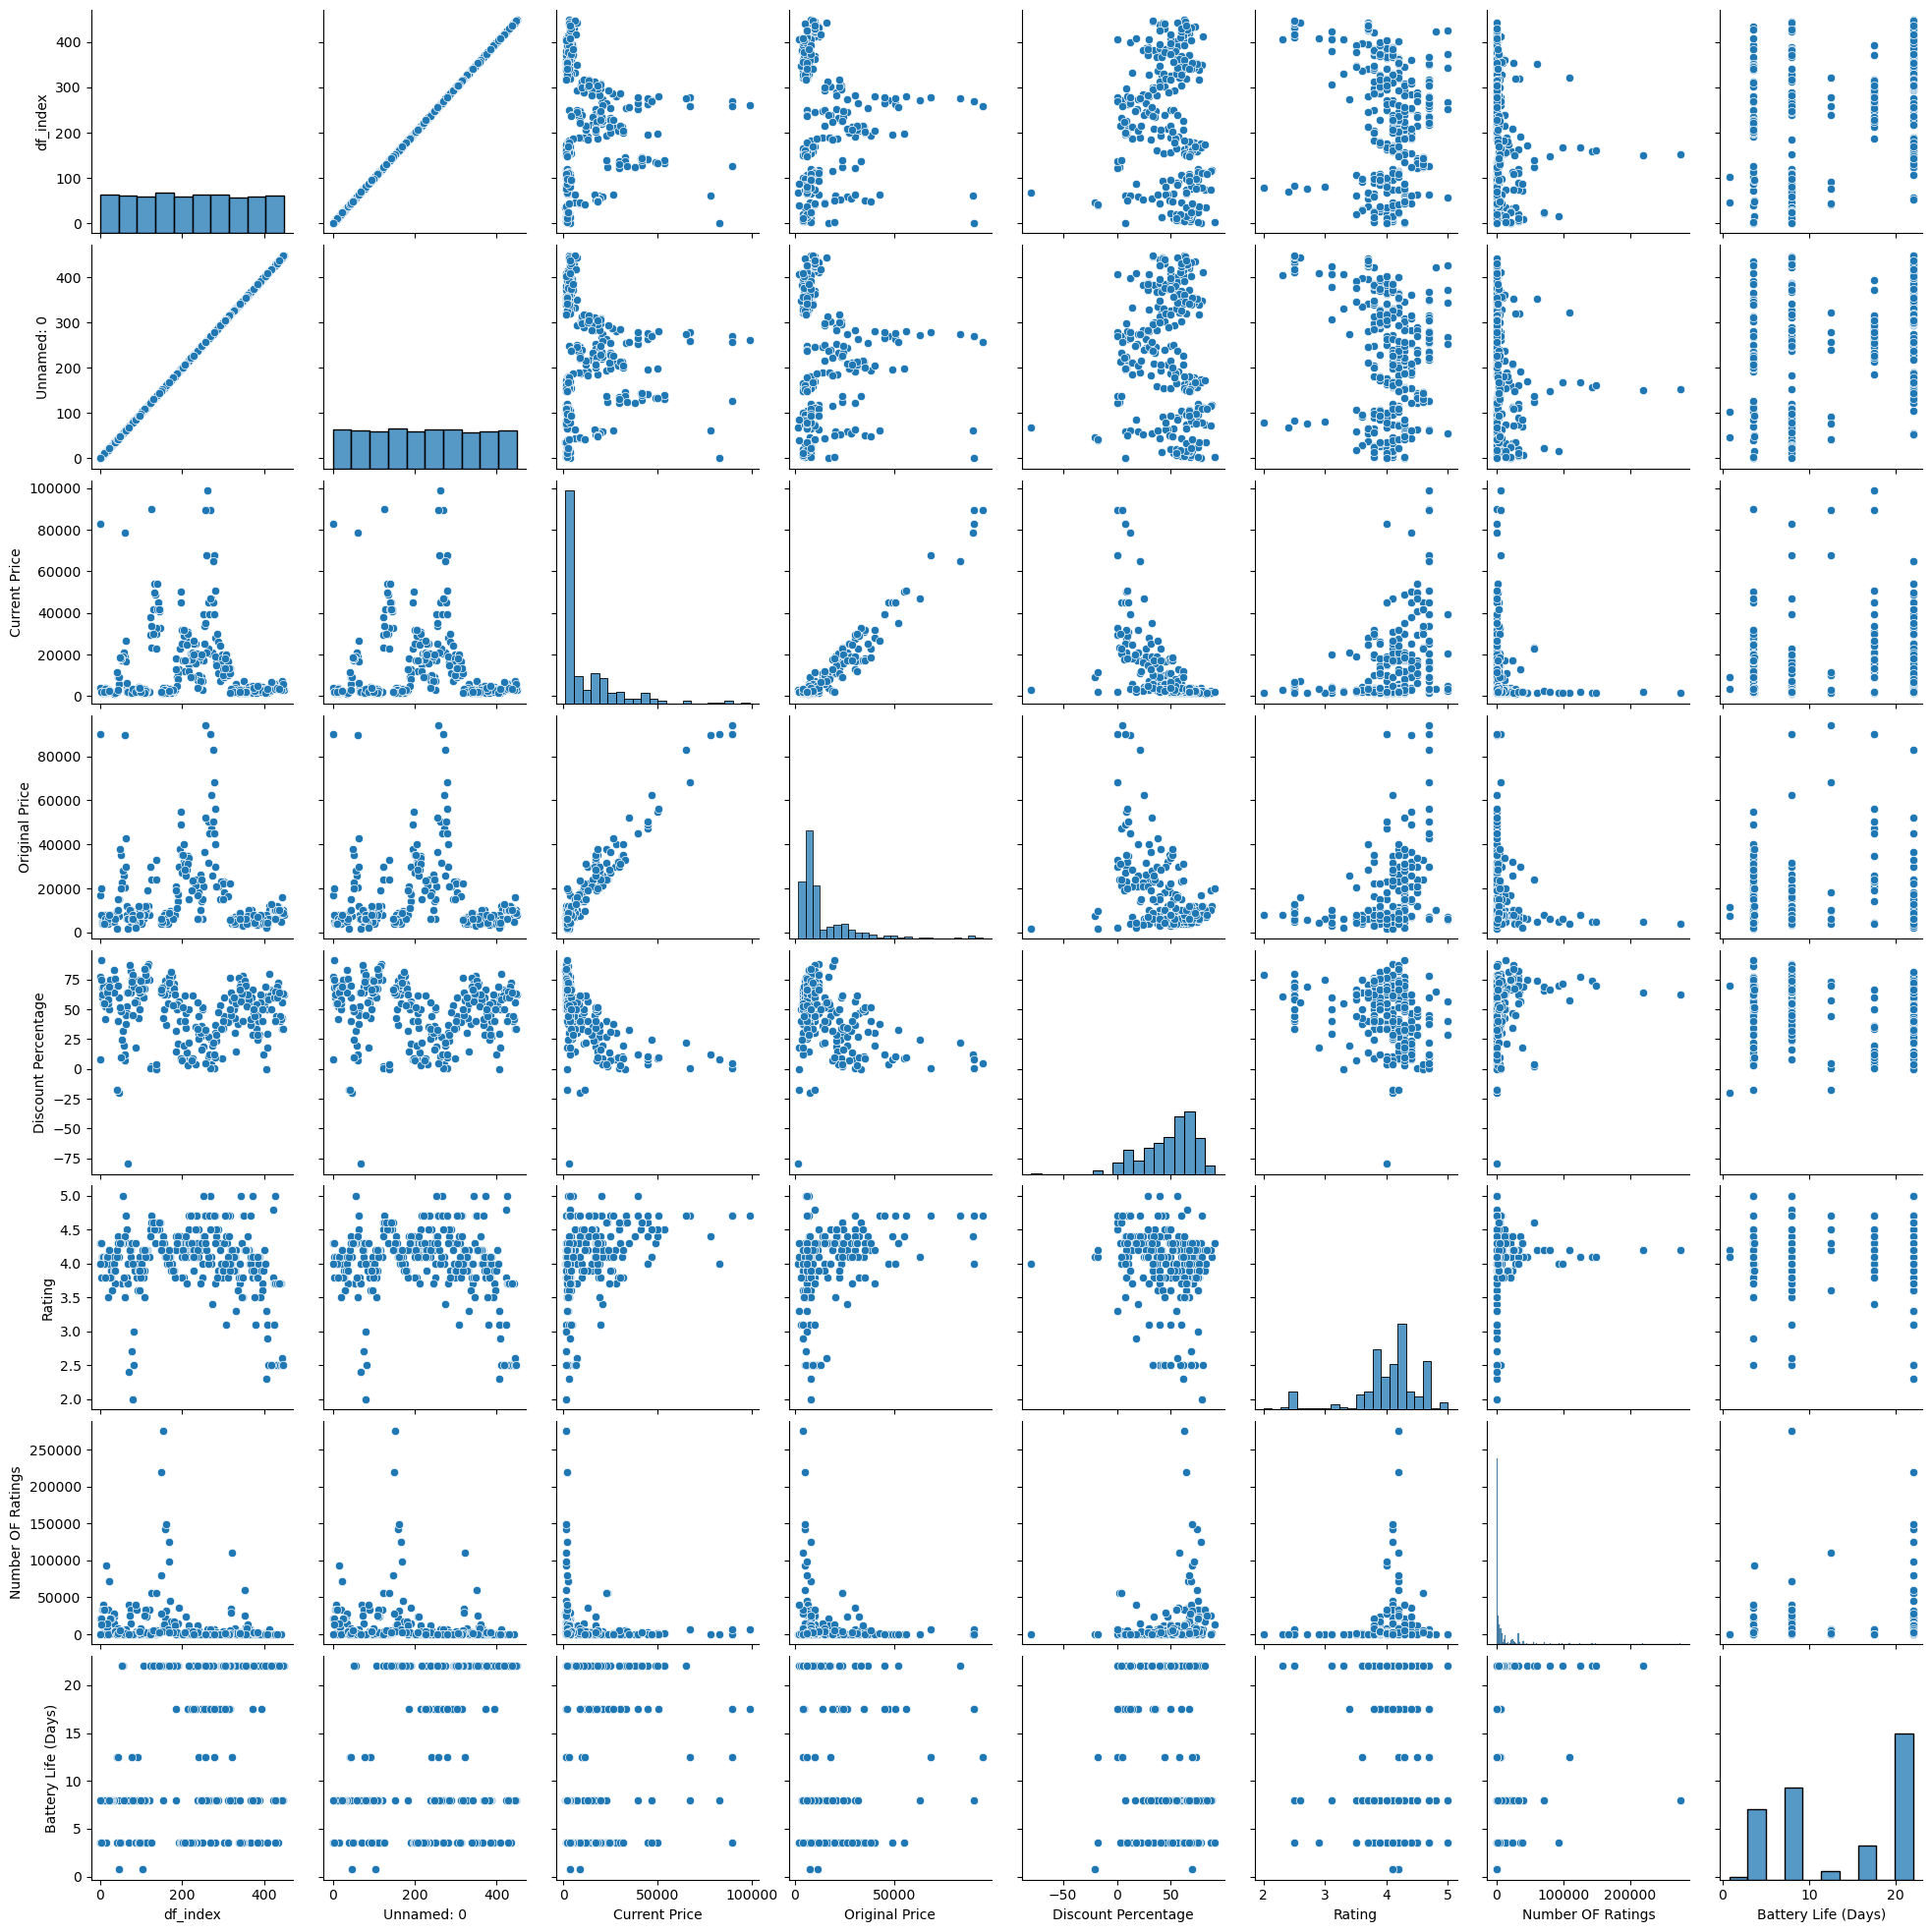

In [32]:
sns.pairplot(train_df)

C:\Users\mshiv\AppData\Local\Temp\ipykernel_13536\3192427303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True)


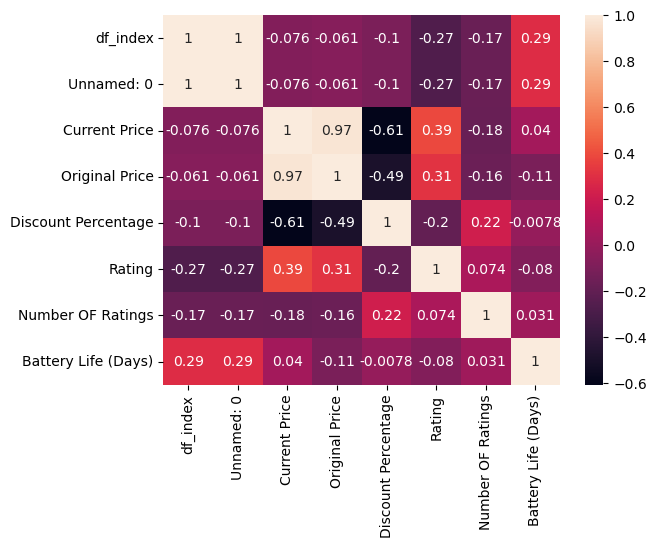

In [33]:
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [34]:
train_df

df_index  Unnamed: 0    Brand  Current Price  Original Price  \
0         124         124    apple        23349.0         23900.0   
1          54          54   garmin            NaN             NaN   
2         268         268   garmin        20490.0             NaN   
3         293         293   huawei         6990.0         14990.0   
4         230         230   fitbit        16999.0             NaN   
..        ...         ...      ...            ...             ...   
355       207         207  samsung        16999.0         28490.0   
356       279         279   garmin        39490.0         44990.0   
357       227         227   fitbit        26499.0             NaN   
358       148         148    noise         1999.0          5999.0   
359       143         143    apple        41900.0             NaN   

     Discount Percentage  Rating  Number OF Ratings  \
0               2.305439     4.6            55800.0   
1                    NaN     3.7                6.0   
2                    NaN     5.0                3.0   
3              53.368913     4.3              119.0   
4                    NaN     4.2              426.0   
..                   ...     ...                ...   
355            40.333450     4.1             1980.0   
356            12.224939     4.7              109.0   
357                  NaN     4.1              367.0   
358            66.677780     4.2            80483.0   
359                  NaN     4.6             2847.0   

                                            Model Name Dial Shape Strap Color  \
0    Watch Series 3 (GPS, 42mm) - Space Grey Alumin...  Rectangle       Black   
1                                                  NaN        NaN         NaN   
2                                      Vivomove Sports     Circle       Brown   
3                                            Watch Fit  Rectangle        Pink   
4                                   Versa Lite Edition     Square      Purple   
..                                                 ...        ...         ...   
355                Galaxy Watch Active 2 Aluminium LTE     Circle        Grey   
356  Instinct 2, Rugged Outdoor Watch with GPS, Bui...     Circle        Grey   
357                                              Ionic     Square        Grey   
358  ColorFit Icon 2 1.8 Display, Bluetooth Calling...  Rectangle       Black   
359  Watch Series7 (GPS, 41mm) - Blue Aluminium Cas...  Rectangle        Blue   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0          Silicon         Yes                 22.0       Yes   1.7 inches   
1              NaN         Yes                 22.0       Yes  35.9 inches   
2          Silicon          No                  3.5       Yes  18.5 inches   
3          Silicon         Yes                 22.0       Yes   4.2 inches   
4          Silicon         Yes                  3.5       Yes   1.0 inches   
..             ...         ...                  ...       ...          ...   
355        Silicon         Yes                  3.5       Yes   1.4 inches   
356        Silicon          No                 17.5       Yes   0.9 inches   
357         Rubber         Yes                 17.5       Yes   1.3 inches   
358        Silicon         Yes                 22.0       Yes   1.8 inches   
359      Aluminium         Yes                 22.0       Yes   1.6 inches   

        Weight  
0          NaN  
1    35 - 50 g  
2          NaN  
3      <= 20 g  
4    20 - 35 g  
..         ...  
355    <= 20 g  
356        NaN  
357        NaN  
358        NaN  
359    <= 20 g  

[360 rows x 17 columns]

In [35]:
train_df.drop(['df_index','Unnamed: 0'],axis=1,inplace=True)

In [36]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   apple        23349.0         23900.0             2.305439     4.6   
1  garmin            NaN             NaN                  NaN     3.7   
2  garmin        20490.0             NaN                  NaN     5.0   
3  huawei         6990.0         14990.0            53.368913     4.3   
4  fitbit        16999.0             NaN                  NaN     4.2   

   Number OF Ratings                                         Model Name  \
0            55800.0  Watch Series 3 (GPS, 42mm) - Space Grey Alumin...   
1                6.0                                                NaN   
2                3.0                                    Vivomove Sports   
3              119.0                                          Watch Fit   
4              426.0                                 Versa Lite Edition   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0  Rectangle       Black        Silicon         Yes                 22.0   
1        NaN         NaN            NaN         Yes                 22.0   
2     Circle       Brown        Silicon          No                  3.5   
3  Rectangle        Pink        Silicon         Yes                 22.0   
4     Square      Purple        Silicon         Yes                  3.5   

  Bluetooth Display Size     Weight  
0       Yes   1.7 inches        NaN  
1       Yes  35.9 inches  35 - 50 g  
2       Yes  18.5 inches        NaN  
3       Yes   4.2 inches    <= 20 g  
4       Yes   1.0 inches  20 - 35 g

In [37]:
train_df['Display Size'].isnull().sum()

23

In [38]:
train_df['Display Size'].describe()

count            337
unique            38
top       1.7 inches
freq              61
Name: Display Size, dtype: object

In [39]:
train_df['Display Size'].value_counts().count()

38

In [40]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [41]:
train_df['Display Size'].isnull().sum()

0

In [42]:
train_df['Display Size'].head()

0     1.7 inches
1    35.9 inches
2    18.5 inches
3     4.2 inches
4     1.0 inches
Name: Display Size, dtype: object

In [43]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [44]:
train_df['Display Size'].head()

0     1.7
1    35.9
2    18.5
3     4.2
4     1.0
Name: Display Size, dtype: float64

In [45]:
train_df['Display Size'].isnull().sum()

0

In [46]:
train_df['Weight'].isnull().sum()

154

In [47]:
train_df['Weight'].describe()

count           206
unique            5
top       20 - 35 g
freq             65
Name: Weight, dtype: object

In [48]:
train_df['Weight'].value_counts()

20 - 35 g    65
35 - 50 g    48
75g +        46
<= 20 g      33
50 - 75 g    14
Name: Weight, dtype: int64

In [49]:
cal=sum([int(x) for x in re.findall('\d+','20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g',cal, inplace=True)

In [50]:
cal

27.5

In [51]:
cal=sum([int(x) for x in re.findall('\d+','35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g',cal, inplace=True)

In [52]:
cal=sum([int(x) for x in re.findall('\d+','50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g',cal, inplace=True)

In [53]:
train_df['Weight'].replace('75g +',float( re.findall('\d+','75g +')[0]), inplace=True)

In [54]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g ')[0]), inplace=True)

In [55]:
train_df['Weight'].value_counts()

27.5    65
42.5    48
75.0    46
20.0    33
62.5    14
Name: Weight, dtype: int64

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        351 non-null    float64
 2   Original Price       295 non-null    float64
 3   Discount Percentage  295 non-null    float64
 4   Rating               356 non-null    float64
 5   Number OF Ratings    312 non-null    float64
 6   Model Name           329 non-null    object 
 7   Dial Shape           261 non-null    object 
 8   Strap Color          261 non-null    object 
 9   Strap Material       303 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery Life (Days)  333 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         360 non-null    float64
 14  Weight               206 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

In [57]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   apple        23349.0         23900.0             2.305439     4.6   
1  garmin            NaN             NaN                  NaN     3.7   
2  garmin        20490.0             NaN                  NaN     5.0   
3  huawei         6990.0         14990.0            53.368913     4.3   
4  fitbit        16999.0             NaN                  NaN     4.2   

   Number OF Ratings                                         Model Name  \
0            55800.0  Watch Series 3 (GPS, 42mm) - Space Grey Alumin...   
1                6.0                                                NaN   
2                3.0                                    Vivomove Sports   
3              119.0                                          Watch Fit   
4              426.0                                 Versa Lite Edition   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0  Rectangle       Black        Silicon         Yes                 22.0   
1        NaN         NaN            NaN         Yes                 22.0   
2     Circle       Brown        Silicon          No                  3.5   
3  Rectangle        Pink        Silicon         Yes                 22.0   
4     Square      Purple        Silicon         Yes                  3.5   

  Bluetooth  Display Size  Weight  
0       Yes           1.7     NaN  
1       Yes          35.9    42.5  
2       Yes          18.5     NaN  
3       Yes           4.2    20.0  
4       Yes           1.0    27.5

In [58]:
train_df['Discount Price']=(train_df['Original Price']*(-train_df['Discount Percentage']))*100

In [59]:
train_df['Discount Price'].head()

0   -5.510000e+06
1             NaN
2             NaN
3   -8.000000e+07
4             NaN
Name: Discount Price, dtype: float64

In [60]:
train_df.drop(['Discount Percentage'],axis=1,inplace=True)

In [61]:
numerical_col=[feature for feature in train_df.columns if train_df[feature].dtype=='float64']

In [62]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [63]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0        23349.0         23900.0     4.6            55800.0   
1            NaN             NaN     3.7                6.0   
2        20490.0             NaN     5.0                3.0   
3         6990.0         14990.0     4.3              119.0   
4        16999.0             NaN     4.2              426.0   

   Battery Life (Days)  Display Size  Weight  Discount Price  
0                 22.0           1.7     NaN   -5.510000e+06  
1                 22.0          35.9    42.5             NaN  
2                  3.5          18.5     NaN             NaN  
3                 22.0           4.2    20.0   -8.000000e+07  
4                  3.5           1.0    27.5             NaN

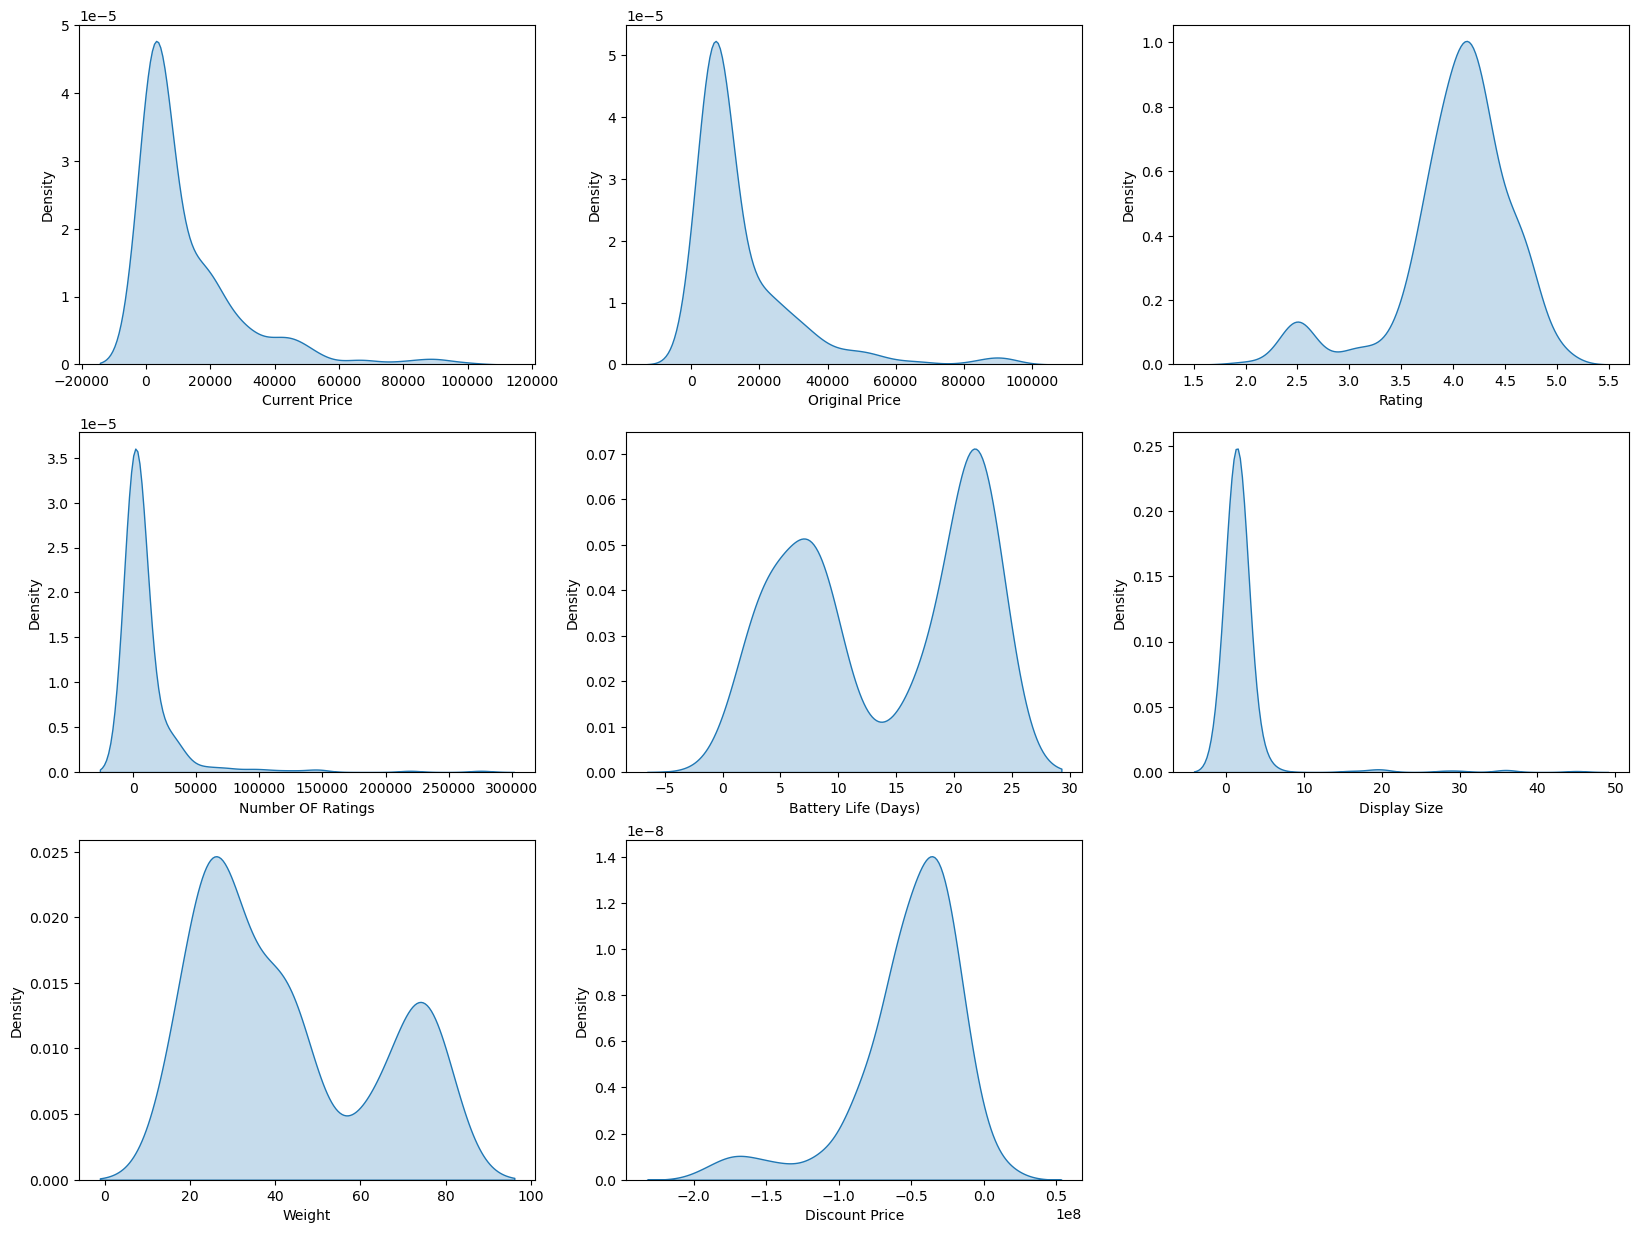

In [64]:
plt.figure(figsize=(20,15))

for i , col in enumerate(numerical_col):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=train_df,x=col,fill=True)
plt.show()

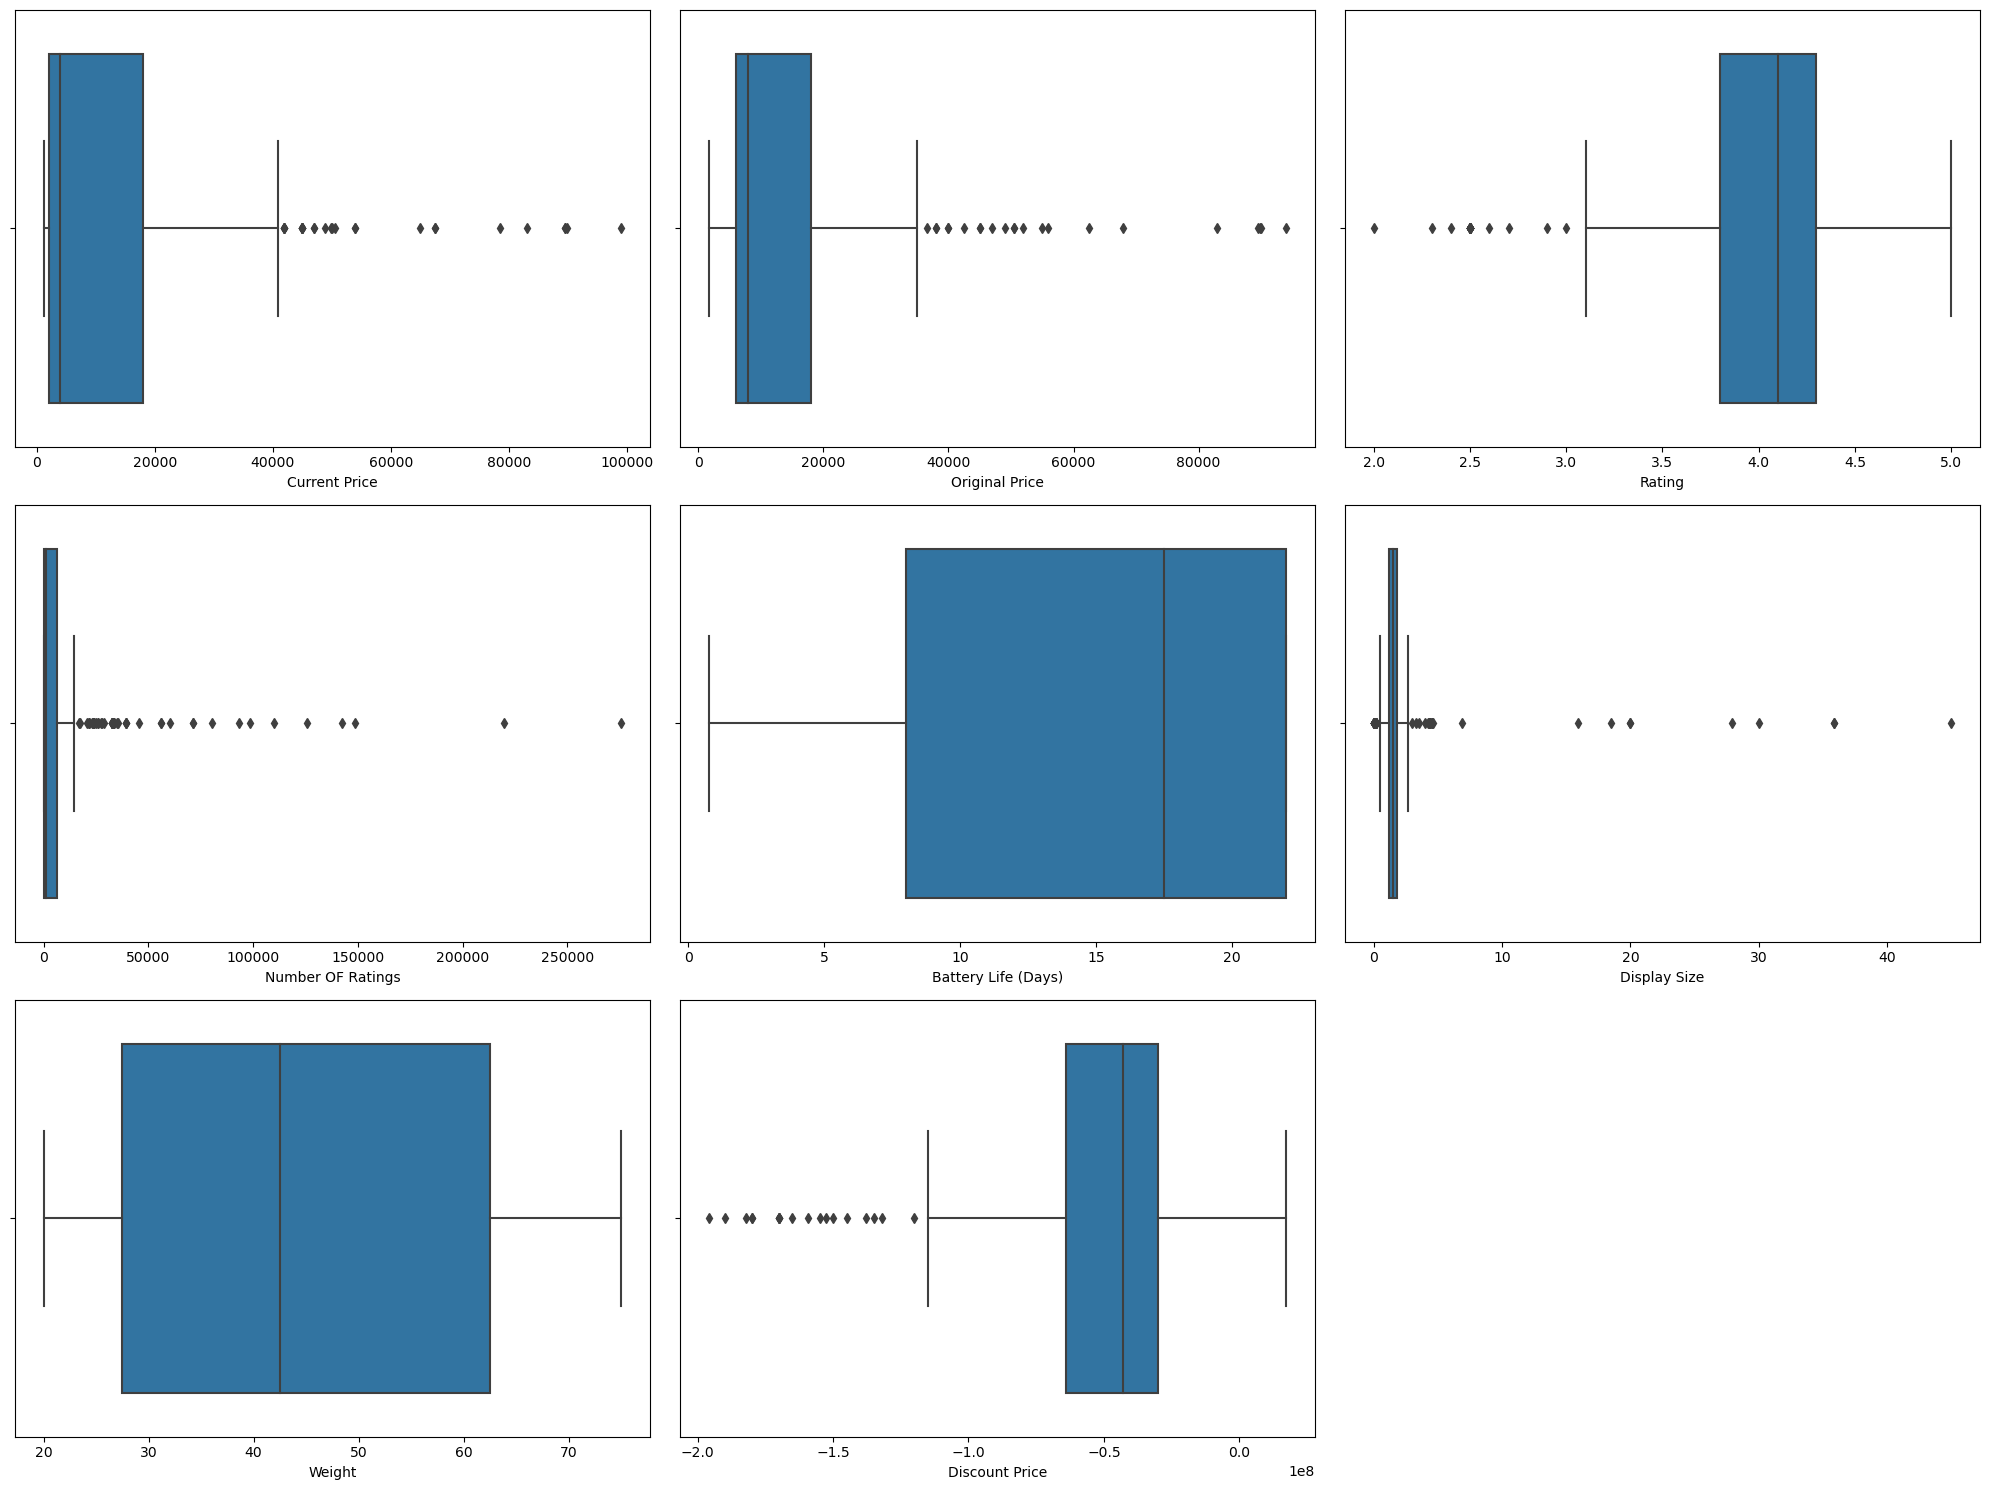

In [65]:
plt.figure(figsize=(20,15))


for i , col in enumerate(numerical_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=train_df,x=col)
plt.tight_layout()
plt.show()

In [66]:
def remove_outlier_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col]<upper_bound)]

In [67]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [68]:
train_df.shape

(360, 15)

In [69]:
import_col=['Current Price', 'Original Price','Rating','Number OF Ratings','Discount Price','Display Size']

In [70]:
for col in import_col:
    train_df= remove_outlier_IQR(train_df,col)

In [71]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(),inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [72]:
train_df.isnull().sum().sort_values()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
Touchscreen             5
Model Name              8
Strap Material         20
Dial Shape             40
Strap Color            40
dtype: int64

In [73]:
train_df.shape

(129, 15)

In [74]:
train_df.head()

Brand  Current Price  Original Price  Rating  Number OF Ratings  \
11   noise         2499.0          6999.0     4.3             3944.0   
12  pebble         3069.0          4999.0     4.0             1371.0   
13   noise         1499.0          3999.0     4.0             6638.0   
15   noise         2999.0          5999.0     4.1             5866.0   
18   noise         1999.0          5999.0     4.1             8765.0   

                                           Model Name Dial Shape Strap Color  \
11  ColorFit Loop Advanced BT Calling with 1.85" d...     Square        Grey   
12  Pace Unisex Smart Watch with Full Touch Dynami...  Rectangle       Black   
13  Core 2 1.28" Display , Noisefit sync app, 100+...     Circle       Black   
15                   Wrb-sw-colorfitpro4-std-slvr_org        NaN         NaN   
18               Wrb-sw-colorfitpulse2max-std-blk_blk        NaN         NaN   

   Strap Material Touchscreen  Battery Life (Days) Bluetooth  Display Size  \
11        Silicon         Yes                 22.0       Yes           1.9   
12        Silicon         Yes                 22.0       Yes           1.4   
13        Silicon         Yes                 22.0       Yes           1.3   
15          Other         Yes                 17.5       Yes           1.7   
18          Other         Yes                  8.0       Yes           1.9   

    Weight  Discount Price  
11    42.5   -4.500000e+07  
12    27.5   -1.930000e+07  
13    42.5   -2.500000e+07  
15    42.5   -3.000000e+07  
18    42.5   -4.000000e+07

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [78]:
data

array([[5.58155511e-02, 1.92735332e-01, 8.33333333e-01, 1.36258341e-01,
        1.00000000e+00, 6.92307692e-01, 4.09090909e-01],
       [8.02885235e-02, 1.17609496e-01, 5.83333333e-01, 4.72979981e-02,
        1.00000000e+00, 3.07692308e-01, 1.36363636e-01],
       [1.28805118e-02, 8.00465780e-02, 5.83333333e-01, 2.29402206e-01,
        1.00000000e+00, 2.30769231e-01, 4.09090909e-01],
       [7.72830707e-02, 1.55172414e-01, 6.66666667e-01, 2.02710646e-01,
        7.88235294e-01, 5.38461538e-01, 4.09090909e-01],
       [3.43480314e-02, 1.55172414e-01, 6.66666667e-01, 3.02942295e-01,
        3.41176471e-01, 6.92307692e-01, 4.09090909e-01],
       [6.77987205e-01, 7.18278116e-01, 9.16666667e-01, 3.00798672e-03,
        7.88235294e-01, 2.30769231e-01, 1.36363636e-01],
       [3.43480314e-02, 1.92397265e-01, 5.00000000e-01, 4.15689935e-01,
        1.00000000e+00, 3.84615385e-01, 4.09090909e-01],
       [5.58155511e-02, 3.05424085e-01, 7.50000000e-01, 8.05552674e-01,
        1.29411765e-01, 6

In [79]:
data_df=pd.DataFrame(data,columns=numerical_col[:-1])

In [80]:
data_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.055816        0.192735  0.833333           0.136258   
1       0.080289        0.117609  0.583333           0.047298   
2       0.012881        0.080047  0.583333           0.229402   
3       0.077283        0.155172  0.666667           0.202711   
4       0.034348        0.155172  0.666667           0.302942   

   Battery Life (Days)  Display Size    Weight  
0             1.000000      0.692308  0.409091  
1             1.000000      0.307692  0.136364  
2             1.000000      0.230769  0.409091  
3             0.788235      0.538462  0.409091  
4             0.341176      0.692308  0.409091

In [81]:
data_df.shape,train_df.shape

((129, 7), (129, 15))

In [82]:
data_df.isnull().sum().sort_values()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [83]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [84]:
train_df.head()

Brand                                         Model Name Dial Shape  \
11   noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
12  pebble  Pace Unisex Smart Watch with Full Touch Dynami...  Rectangle   
13   noise  Core 2 1.28" Display , Noisefit sync app, 100+...     Circle   
15   noise                   Wrb-sw-colorfitpro4-std-slvr_org        NaN   
18   noise               Wrb-sw-colorfitpulse2max-std-blk_blk        NaN   

   Strap Color Strap Material Touchscreen Bluetooth  Discount Price  
11        Grey        Silicon         Yes       Yes   -4.500000e+07  
12       Black        Silicon         Yes       Yes   -1.930000e+07  
13       Black        Silicon         Yes       Yes   -2.500000e+07  
15         NaN          Other         Yes       Yes   -3.000000e+07  
18         NaN          Other         Yes       Yes   -4.000000e+07

In [85]:
train_df=pd.concat([train_df.reset_index(),data_df],axis=1)

In [86]:
train_df.head()

index   Brand                                         Model Name  \
0     11   noise  ColorFit Loop Advanced BT Calling with 1.85" d...   
1     12  pebble  Pace Unisex Smart Watch with Full Touch Dynami...   
2     13   noise  Core 2 1.28" Display , Noisefit sync app, 100+...   
3     15   noise                   Wrb-sw-colorfitpro4-std-slvr_org   
4     18   noise               Wrb-sw-colorfitpulse2max-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen Bluetooth  Discount Price  \
0     Square        Grey        Silicon         Yes       Yes   -4.500000e+07   
1  Rectangle       Black        Silicon         Yes       Yes   -1.930000e+07   
2     Circle       Black        Silicon         Yes       Yes   -2.500000e+07   
3        NaN         NaN          Other         Yes       Yes   -3.000000e+07   
4        NaN         NaN          Other         Yes       Yes   -4.000000e+07   

   Current Price  Original Price    Rating  Number OF Ratings  \
0       0.055816        0.192735  0.833333           0.136258   
1       0.080289        0.117609  0.583333           0.047298   
2       0.012881        0.080047  0.583333           0.229402   
3       0.077283        0.155172  0.666667           0.202711   
4       0.034348        0.155172  0.666667           0.302942   

   Battery Life (Days)  Display Size    Weight  
0             1.000000      0.692308  0.409091  
1             1.000000      0.307692  0.136364  
2             1.000000      0.230769  0.409091  
3             0.788235      0.538462  0.409091  
4             0.341176      0.692308  0.409091

In [87]:
pd.concat([train_df.reset_index(), data_df], axis=1)

level_0  index       Brand  \
0          0     11       noise   
1          1     12      pebble   
2          2     13       noise   
3          3     15       noise   
4          4     18       noise   
..       ...    ...         ...   
124      124    344        boat   
125      125    346  crossbeats   
126      126    348  crossbeats   
127      127    350        boat   
128      128    354     gizmore   

                                            Model Name Dial Shape Strap Color  \
0    ColorFit Loop Advanced BT Calling with 1.85" d...     Square        Grey   
1    Pace Unisex Smart Watch with Full Touch Dynami...  Rectangle       Black   
2    Core 2 1.28" Display , Noisefit sync app, 100+...     Circle       Black   
3                     Wrb-sw-colorfitpro4-std-slvr_org        NaN         NaN   
4                 Wrb-sw-colorfitpulse2max-std-blk_blk        NaN         NaN   
..                                                 ...        ...         ...   
124  Wave Select with 1.69" HD Display, upto 10 Day...     Square       Green   
125                                             S4 Max        NaN         NaN   
126                                             S4 Max        NaN         NaN   
127  Wave Infinity with 1.85" HD Screen, Functional...  Rectangle       Black   
128  Blaze Max 1.85" BT Calling Edge to Edge Displa...     Square        Grey   

    Strap Material Touchscreen Bluetooth  Discount Price  ...  \
0          Silicon         Yes       Yes   -4.500000e+07  ...   
1          Silicon         Yes       Yes   -1.930000e+07  ...   
2          Silicon         Yes       Yes   -2.500000e+07  ...   
3            Other         Yes       Yes   -3.000000e+07  ...   
4            Other         Yes       Yes   -4.000000e+07  ...   
..             ...         ...       ...             ...  ...   
124        Silicon         Yes       Yes   -3.191000e+07  ...   
125            NaN         Yes       Yes   -8.000000e+07  ...   
126            NaN         Yes       Yes   -4.000000e+07  ...   
127        Silicon         Yes       Yes   -6.491000e+07  ...   
128        Silicon         Yes       Yes   -4.000000e+07  ...   

     Battery Life (Days)  Display Size    Weight  Current Price  \
0               1.000000      0.692308  0.409091       0.055816   
1               1.000000      0.307692  0.136364       0.080289   
2               1.000000      0.230769  0.409091       0.012881   
3               0.788235      0.538462  0.409091       0.077283   
4               0.341176      0.692308  0.409091       0.034348   
..                   ...           ...       ...            ...   
124             1.000000      0.461538  0.409091       0.068696   
125             0.134118      0.692308  0.136364       0.120218   
126             0.134118      0.692308  0.136364       0.120218   
127             1.000000      0.692308  0.409091       0.055816   
128             0.341176      0.692308  0.409091       0.034348   

     Original Price    Rating  Number OF Ratings  Battery Life (Days)  \
0          0.192735  0.833333           0.136258             1.000000   
1          0.117609  0.583333           0.047298             1.000000   
2          0.080047  0.583333           0.229402             1.000000   
3          0.155172  0.666667           0.202711             0.788235   
4          0.155172  0.666667           0.302942             0.341176   
..              ...       ...                ...                  ...   
124        0.154834  0.500000           0.083083             1.000000   
125        0.380550  0.500000           0.133216             0.134118   
126        0.230298  0.500000           0.133216             0.134118   
127        0.267523  0.750000           0.099920             1.000000   
128        0.155172  0.583333           0.040625             0.341176   

     Display Size    Weight  
0        0.692308  0.409091  
1        0.307692  0.136364  
2        0.230769  0.409091  
3        0.538462  0.409091 

In [88]:
train_df[numerical_col]

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.055816        0.192735  0.833333           0.136258   
1         0.080289        0.117609  0.583333           0.047298   
2         0.012881        0.080047  0.583333           0.229402   
3         0.077283        0.155172  0.666667           0.202711   
4         0.034348        0.155172  0.666667           0.302942   
..             ...             ...       ...                ...   
124       0.068696        0.154834  0.500000           0.083083   
125       0.120218        0.380550  0.500000           0.133216   
126       0.120218        0.230298  0.500000           0.133216   
127       0.055816        0.267523  0.750000           0.099920   
128       0.034348        0.155172  0.583333           0.040625   

     Battery Life (Days)  Display Size    Weight  Discount Price  
0               1.000000      0.692308  0.409091   -4.500000e+07  
1               1.000000      0.307692  0.136364   -1.930000e+07  
2               1.000000      0.230769  0.409091   -2.500000e+07  
3               0.788235      0.538462  0.409091   -3.000000e+07  
4               0.341176      0.692308  0.409091   -4.000000e+07  
..                   ...           ...       ...             ...  
124             1.000000      0.461538  0.409091   -3.191000e+07  
125             0.134118      0.692308  0.136364   -8.000000e+07  
126             0.134118      0.692308  0.136364   -4.000000e+07  
127             1.000000      0.692308  0.409091   -6.491000e+07  
128             0.341176      0.692308  0.409091   -4.000000e+07  

[129 rows x 8 columns]

In [89]:
train_df.shape

(129, 16)

# Categorical Data

In [90]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [91]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [92]:
train_df[categorical_col].head()

Brand                                         Model Name Dial Shape  \
0   noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
1  pebble  Pace Unisex Smart Watch with Full Touch Dynami...  Rectangle   
2   noise  Core 2 1.28" Display , Noisefit sync app, 100+...     Circle   
3   noise                   Wrb-sw-colorfitpro4-std-slvr_org        NaN   
4   noise               Wrb-sw-colorfitpulse2max-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  
0        Grey        Silicon         Yes       Yes  
1       Black        Silicon         Yes       Yes  
2       Black        Silicon         Yes       Yes  
3         NaN          Other         Yes       Yes  
4         NaN          Other         Yes       Yes

In [93]:
train_df['Touchscreen'].value_counts()

Yes    123
No       1
Name: Touchscreen, dtype: int64

In [94]:
train_df['Bluetooth'].value_counts()

Yes    129
Name: Bluetooth, dtype: int64

In [95]:
categorical_col.remove('Bluetooth')

In [96]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen']

### ANOVA TEST 

In [97]:
from scipy.stats import f_oneway

In [98]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col,':','P-Value for ANOVA is : ',AnovaResults)
    
    
    
    #If the p-value is less than 0.05, it is judged as “significant,” 
    #and if the p-value is greater than 0.05, it is judged as “not significant.”

Brand : P-Value for ANOVA is :  F_onewayResult(statistic=5.551214202674396, pvalue=1.3579068238615405e-08)
Model Name : P-Value for ANOVA is :  F_onewayResult(statistic=2.6531294945636312, pvalue=0.13632613567692745)
Dial Shape : P-Value for ANOVA is :  F_onewayResult(statistic=7.996610203579142, pvalue=9.330373450841231e-05)
Strap Color : P-Value for ANOVA is :  F_onewayResult(statistic=0.6632827148116469, pvalue=0.8196875159732031)
Strap Material : P-Value for ANOVA is :  F_onewayResult(statistic=1.3205304857314297, pvalue=0.2420355304708505)
Touchscreen : P-Value for ANOVA is :  F_onewayResult(statistic=0.03230145007910508, pvalue=0.8576658177796739)


In [99]:
imp_col= ['Brand','Model Name','Dial Shape','Strap Material']

In [100]:
train_df[imp_col].head()

Brand                                         Model Name Dial Shape  \
0   noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
1  pebble  Pace Unisex Smart Watch with Full Touch Dynami...  Rectangle   
2   noise  Core 2 1.28" Display , Noisefit sync app, 100+...     Circle   
3   noise                   Wrb-sw-colorfitpro4-std-slvr_org        NaN   
4   noise               Wrb-sw-colorfitpulse2max-std-blk_blk        NaN   

  Strap Material  
0        Silicon  
1        Silicon  
2        Silicon  
3          Other  
4          Other

In [101]:
train_df[imp_col].isnull().sum()

Brand              0
Model Name         8
Dial Shape        40
Strap Material    20
dtype: int64

In [102]:
for col in imp_col:
    train_df[col].fillna('other',inplace=True)

In [103]:
train_df[imp_col].isnull().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [104]:
train_df[imp_col].dtypes

Brand             object
Model Name        object
Dial Shape        object
Strap Material    object
dtype: object

In [105]:
# Converting into Numerical value 
pd.get_dummies(train_df["Brand"])

amazfit  ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  \
0          0        0     0           0     0           0       0       0   
1          0        0     0           0     0           0       0       0   
2          0        0     0           0     0           0       0       0   
3          0        0     0           0     0           0       0       0   
4          0        0     0           0     0           0       0       0   
..       ...      ...   ...         ...   ...         ...     ...     ...   
124        0        0     1           0     0           0       0       0   
125        0        0     0           1     0           0       0       0   
126        0        0     0           1     0           0       0       0   
127        0        0     1           0     0           0       0       0   
128        0        0     0           0     0           0       0       0   

     garmin  gizmore  hammer  honor  huawei  noise  pebble  samsung  zebronics  
0         0        0       0      0       0      1       0        0          0  
1         0        0       0      0       0      0       1        0          0  
2         0        0       0      0       0      1       0        0          0  
3         0        0       0      0       0      1       0        0          0  
4         0        0       0      0       0      1       0        0          0  
..      ...      ...     ...    ...     ...    ...     ...      ...        ...  
124       0        0       0      0       0      0       0        0          0  
125       0        0       0      0       0      0       0        0          0  
126       0        0       0      0       0      0       0        0          0  
127       0        0       0      0       0      0       0        0          0  
128       0        1       0      0       0      0       0        0          0  

[129 rows x 17 columns]

In [106]:
brand=pd.get_dummies(train_df["Brand"],drop_first=True)

In [107]:
model_name = pd.get_dummies(train_df["Model Name"]).drop(['other'],axis=1)
dial_shape = pd.get_dummies(train_df["Dial Shape"]).drop(['other'],axis=1)
strap_material = pd.get_dummies(train_df["Strap Material"]).drop(['other'],axis=1)

In [108]:
imp_df = pd.concat([brand,model_name,dial_shape,strap_material], axis=1)

In [109]:
imp_df.head()

ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  garmin  \
0        0     0           0     0           0       0       0       0   
1        0     0           0     0           0       0       0       0   
2        0     0           0     0           0       0       0       0   
3        0     0           0     0           0       0       0       0   
4        0     0           0     0           0       0       0       0   

   gizmore  hammer  ...  Square  Fluoroelastomer  Leather  Metal  Nylon  \
0        0       0  ...       1                0        0      0      0   
1        0       0  ...       0                0        0      0      0   
2        0       0  ...       0                0        0      0      0   
3        0       0  ...       0                0        0      0      0   
4        0       0  ...       0                0        0      0      0   

   Other  Plastic  Rubber  Silicon  Stainless Steel  
0      0        0       0        1                0  
1      0        0       0        1                0  
2      0        0       0        1                0  
3      1        0       0        0                0  
4      1        0       0        0                0  

[5 rows x 145 columns]

In [110]:
new_df= pd.concat([train_df[numerical_col],imp_df], axis=1)

In [111]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.055816        0.192735  0.833333           0.136258   
1       0.080289        0.117609  0.583333           0.047298   
2       0.012881        0.080047  0.583333           0.229402   
3       0.077283        0.155172  0.666667           0.202711   
4       0.034348        0.155172  0.666667           0.302942   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             1.000000      0.692308  0.409091   -4.500000e+07        0     0   
1             1.000000      0.307692  0.136364   -1.930000e+07        0     0   
2             1.000000      0.230769  0.409091   -2.500000e+07        0     0   
3             0.788235      0.538462  0.409091   -3.000000e+07        0     0   
4             0.341176      0.692308  0.409091   -4.000000e+07        0     0   

   ...  Square  Fluoroelastomer  Leather  Metal  Nylon  Other  Plastic  \
0  ...       1                0        0      0      0      0        0   
1  ...       0                0        0      0      0      0        0   
2  ...       0                0        0      0      0      0        0   
3  ...       0                0        0      0      0      1        0   
4  ...       0                0        0      0      0      1        0   

   Rubber  Silicon  Stainless Steel  
0       0        1                0  
1       0        1                0  
2       0        1                0  
3       0        0                0  
4       0        0                0  

[5 rows x 153 columns]

In [112]:
train_df[numerical_col].isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [113]:
new_df.isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
                      ..
Other                  0
Plastic                0
Rubber                 0
Silicon                0
Stainless Steel        0
Length: 153, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
cln_df = pd.read_csv(r"E:\Data Science Projects\Project Files\Fitness Tracker E commerce Product\archive\clean.csv")

In [116]:
cln_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             0.129412      0.615385  0.772727   -13200.000001        0     0   
1             0.341176      0.538462  0.409091    -5991.000000        0     1   
2             0.129412      0.615385  1.000000   -18200.000000        0     0   
3             0.341176      0.538462  0.409091    -3400.000000        0     0   
4             0.341176      0.538462  0.409091    -2500.000000        0     0   

   ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0  ...        0      0      0      0        0       0        1   
1  ...        0      0      0      0        0       0        1   
2  ...        0      0      0      0        0       0        1   
3  ...        0      0      0      1        0       0        0   
4  ...        0      0      0      1        0       0        0   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                0          0                            0  
1                0          0                            0  
2                0          0                            0  
3                0          0                            0  
4                0          0                            0  

[5 rows x 201 columns]

In [117]:
X = cln_df.drop('Discount Price',axis = 1)
y = cln_df['Discount Price']

In [118]:
X

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  ambrane  boat  crossbeats  \
0               0.129412      0.615385  0.772727        0     0           0   
1               0.341176      0.538462  0.409091        0     1           0   
2               0.129412      0.615385  1.000000        0     0           0   
3               0.341176      0.538462  0.409091        0     0           0   
4               0.341176      0.538462  0.409091        0     0           0   
..                   ...           ...       ...      ...   ...         ...   
176             1.000000      0.615385  0.409091        0     0           0   
177             1.000000      0.538462  0.409091        0     0           0   
178             1.000000      1.000000  0.409091        0     0           0   
179             1.000000      0.538462  0.409091        0     0           0   
180             1.000000      0.538462  0.409091        0     0           0   

     ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0    ...        0      0      0      0        0       0        1   
1    ...        0      0      0      0        0       0        1   
2    ...        0      0      0      0        0       0        1   
3    ...        0      0      0      1        0       0        0   
4    ...        0      0      0      1        0       0        0   
..   ...      ...    ...    ...    ...      ...     ...      ...   
176  ...        0      0      0      0        0       0        1   
177  ...        0      0      0      0        0       1        0   
178  ...        0      0      0      0        0       0        1   
179  ...        0      0      0      0        0       0        1   
180  ...        0      0      0      0        0       1        0   

     Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                  0          0                            0  
1                  0          0                            0  
2                  0          0                            0  
3                  0          0                            0  
4                  0          0                            0  
..               ...        ...                          ...  
176                0          0                            0  
177                0          0                            0  
178                0          0                            0  
179                0          0                            0  
180                0          0                            0  

[181 rows x 200 columns]

In [119]:
y

0     -13200.000001
1      -5991.000000
2     -18200.000000
3      -3400.000000
4      -2500.000000
           ...     
176    -2000.000000
177    -2700.000000
178       -2.000000
179    -6000.000000
180    -6000.000000
Name: Discount Price, Length: 181, dtype: float64

In [120]:
#80% Training 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression 

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [122]:
lr_model = LinearRegression()

In [123]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [124]:
y_pred = lr_model.predict(X_test)

In [125]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [126]:
print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  211922.92801139137
Mean Squared Error =  95449583402.57518
Root Mean Squared Error =  308949.1598994488


In [127]:
res = r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  -8157.35319347294


## Decision Tree Regressor 

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
dt_model = DecisionTreeRegressor()


In [130]:
dt_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [131]:
y_pred = dt_model.predict(X_test)


In [132]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  867.7567566586407
Mean Squared Error =  2449468.890840053
Root Mean Squared Error =  1565.0779184564751


In [133]:
res= r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  0.7906367777048001


## Random Forest Regressor 

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
rf_model = RandomForestRegressor()

In [136]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [137]:
y_pred = rf_model.predict(X_test)

In [138]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  1127.3589188287121
Mean Squared Error =  4881803.653603265
Root Mean Squared Error =  2209.480403534565


In [139]:
res = r2_score(y_test, y_pred)
print('R2 Score = ',res)

R2 Score =  0.5827380591143834


## XGBoost 

In [140]:
import xgboost as xgb

In [141]:
model=xgb.XGBRegressor()

In [142]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred = model.predict(X_test)

In [144]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Mean Absolute Error =  982.2084564429122
Mean Squared Error =  3557898.966660269
Root Mean Squared Error =  1886.2393715168469


In [145]:
res= r2_score(y_test,y_pred)

In [146]:
print('R2 Score = ',res)

R2 Score =  0.6958960389142593


## Cross Validation

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
score = cross_val_score(dt_model , X , y , cv=5 , scoring='r2') # For Decision Tree

In [149]:
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [ 0.51883281  0.21327941 -0.06798125  0.01874996 -0.14603376] 0.10736943416082372 0.23804767935792162


In [150]:
# for Random Forest
score = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

In [151]:
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [0.46665129 0.75227339 0.47559809 0.63314811 0.76664888] 0.6188639523559767 0.129256569056184


In [152]:
#XGBoost
score = cross_val_score(model, X, y, cv=5, scoring='r2')

In [153]:
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745987 0.11047932405115406


### Ridge Model   &   LASO

In [154]:
from sklearn.linear_model import Ridge,Lasso

In [155]:
ridge_model=Ridge(alpha=1.0)
ridge_score=cross_val_score(ridge_model,X_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error

In [156]:
ridge_score

array([0.5241189 , 0.44327664, 0.69799693, 0.59013271, 0.4826003 ])

In [157]:
lasso_model=Lasso(alpha=1.0)
lasso_score= cross_val_score(lasso_model,X_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error

In [158]:
lr_model.fit(X_train,y_train)
lr_prediction=lr_model.predict(X_test)
lr_mae=mean_absolute_error(y_test,lr_prediction)
lr_mse=mean_squared_error(y_test,lr_prediction)
lr_r2=r2_score(y_test,lr_prediction)

In [159]:
print('Linear MAE',lr_mae)
print("Linear MSE",lr_mse)
print('Linear R2',lr_r2)

Linear MAE 211922.92801139137
Linear MSE 95449583402.57518
Linear R2 -8157.35319347294


In [160]:
lasso_model.fit(X_train,y_train)
lasso_prediction=lasso_model.predict(X_test)
lasso_mae=mean_absolute_error(y_test,lasso_prediction)
lassso_mse=mean_squared_error(y_test,lasso_prediction)
lasso_r2=r2_score(y_test,lasso_prediction)

In [161]:
print('Lasso MAE',lasso_mae)
print("Lasso MSE",lassso_mse)
print('Lasso R2',lasso_r2)

Lasso MAE 15.46642756028616
Lasso MSE 476.3009571664568
Lasso R2 0.9999592891734418


In [162]:
ridge_model.fit(X_train,y_train)
ridge_prediction=lasso_model.predict(X_test)
ridge_mae=mean_absolute_error(y_test,lasso_prediction)
ridge_mse=mean_squared_error(y_test,lasso_prediction)
ridge_r2=r2_score(y_test,lasso_prediction)

In [163]:
print('Ridge MAE',ridge_mae)
print("Ridge MSE",ridge_mse)
print('Ridge R2',ridge_r2)

Ridge MAE 15.46642756028616
Ridge MSE 476.3009571664568
Ridge R2 0.9999592891734418


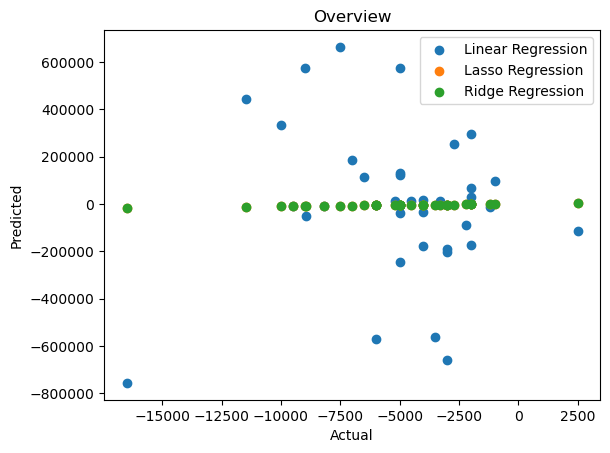

In [164]:
#plot for all
plt.scatter(y_test, lr_prediction,alpha=1.0,label="Linear Regression")
plt.scatter(y_test, lasso_prediction,alpha=1.0,label="Lasso Regression")
plt.scatter(y_test, ridge_prediction,alpha=1.0,label="Ridge Regression")


plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')
plt.legend()

# Grid Search CV

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [167]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='r2')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [168]:
best_params = grid_search.best_params_

In [169]:
best_model = xgb.XGBRegressor(**best_params)

In [170]:
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:
y_pred = best_model.predict(X_test)

In [172]:
r2=r2_score(y_test,y_pred)
print(r2)

0.7460260949741992


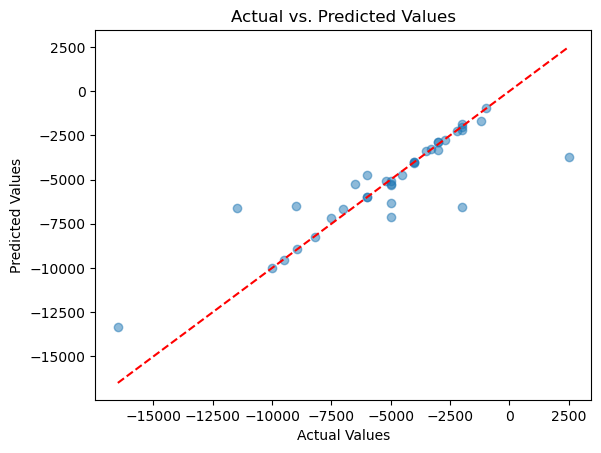

In [173]:
plt.scatter(y_test,y_pred, alpha = 0.5)


plt.plot([min(y_test),max(y_test)], [ min(y_test), max(y_test)], 'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted Values')
plt.show()

## Pickle 

In [174]:
import pickle

In [175]:
with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [176]:
with open('model.pkl','rb')as f:
    xgb_model = pickle.load(f)
    

In [177]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_pred))

0.7460260949741992


In [178]:
df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0       noise   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN         NaN   
1  fire-boltt                                  BSW046        NaN         NaN   
2        boat                               Wave Call        NaN         NaN   
3  fire-boltt                                  BSW053        NaN         NaN   
4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   

  Strap Material Touchscreen  
0            NaN         NaN  
1        Silicon         Yes  
2        Silicon         Yes  
3        Silicon         Yes  
4          Other         Yes

## OneHotEncoder

In [179]:
encoder=OneHotEncoder(drop='first',sparse=False)


In [180]:
encoder_cols=pd.DataFrame(encoder.fit_transform(train_df[categorical_col]),columns=encoder.get_feature_names_out(categorical_col))

C:\Users\mshiv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [181]:
encoder_cols

Brand_ambrane  Brand_boat  Brand_crossbeats  Brand_dizo  \
0              0.0         0.0               0.0         0.0   
1              0.0         0.0               0.0         0.0   
2              0.0         0.0               0.0         0.0   
3              0.0         0.0               0.0         0.0   
4              0.0         0.0               0.0         0.0   
..             ...         ...               ...         ...   
124            0.0         1.0               0.0         0.0   
125            0.0         0.0               1.0         0.0   
126            0.0         0.0               1.0         0.0   
127            0.0         1.0               0.0         0.0   
128            0.0         0.0               0.0         0.0   

     Brand_fire-boltt  Brand_fitbit  Brand_fossil  Brand_garmin  \
0                 0.0           0.0           0.0           0.0   
1                 0.0           0.0           0.0           0.0   
2                 0.0           0.0           0.0           0.0   
3                 0.0           0.0           0.0           0.0   
4                 0.0           0.0           0.0           0.0   
..                ...           ...           ...           ...   
124               0.0           0.0           0.0           0.0   
125               0.0           0.0           0.0           0.0   
126               0.0           0.0           0.0           0.0   
127               0.0           0.0           0.0           0.0   
128               0.0           0.0           0.0           0.0   

     Brand_gizmore  Brand_hammer  ...  Strap Material_Metal  \
0              0.0           0.0  ...                   0.0   
1              0.0           0.0  ...                   0.0   
2              0.0           0.0  ...                   0.0   
3              0.0           0.0  ...                   0.0   
4              0.0           0.0  ...                   0.0   
..             ...           ...  ...                   ...   
124            0.0           0.0  ...                   0.0   
125            0.0           0.0  ...                   0.0   
126            0.0           0.0  ...                   0.0   
127            0.0           0.0  ...                   0.0   
128            1.0           0.0  ...                   0.0   

     Strap Material_Nylon  Strap Material_Other  Strap Material_Plastic  \
0                     0.0                   0.0                     0.0   
1                     0.0                   0.0                     0.0   
2                     0.0                   0.0                     0.0   
3                     0.0                   1.0                     0.0   
4                     0.0                   1.0                     0.0   
..                    ...                   ...                     ...   
124                   0.0                   0.0                     0.0   
125                   0.0                   0.0                     0.0   
126                   0.0                   0.0                     0.0   
127                   0.0                   0.0                     0.0   
128                   0.0                   0.0                     0.0   

     Strap Material_Rubber  Strap Material_Silicon  \
0                      0.0                     1.0   
1                      0.0                     1.0   
2                      0.0                     1.0   
3                      0.0                     0.0   
4                      0.0                     0.0   
..                     ...                     ...   
124                    0.0                     1.0   
125                    0.0                     0.0   
126                    0.0                     0.0   
127                    0.0                     1.0   
128                    0.0                     1.0   

     Strap Material_Stainless Steel  Strap Material_other  Touchscreen_Yes  \
0                               0.0           

In [182]:
train_df[numerical_col].head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.055816        0.192735  0.833333           0.136258   
1       0.080289        0.117609  0.583333           0.047298   
2       0.012881        0.080047  0.583333           0.229402   
3       0.077283        0.155172  0.666667           0.202711   
4       0.034348        0.155172  0.666667           0.302942   

   Battery Life (Days)  Display Size    Weight  Discount Price  
0             1.000000      0.692308  0.409091   -4.500000e+07  
1             1.000000      0.307692  0.136364   -1.930000e+07  
2             1.000000      0.230769  0.409091   -2.500000e+07  
3             0.788235      0.538462  0.409091   -3.000000e+07  
4             0.341176      0.692308  0.409091   -4.000000e+07

In [183]:
num_cols = ['Current Price','Original Price','Rating','Number OF Ratings','Battery Life (Days)']

In [184]:
std=StandardScaler()
scled_cols=pd.DataFrame(std.fit_transform(train_df[num_cols]),columns=num_cols)

In [185]:
scled_cols

Current Price  Original Price    Rating  Number OF Ratings  \
0        -0.516077       -0.460451  1.034400          -0.241283   
1        -0.410936       -0.781022 -0.125927          -0.568615   
2        -0.700534       -0.941308 -0.125927           0.101443   
3        -0.423848       -0.620737  0.260849           0.003231   
4        -0.608305       -0.620737  0.260849           0.372036   
..             ...             ...       ...                ...   
124      -0.460740       -0.622179 -0.512703          -0.436944   
125      -0.239391        0.340977 -0.512703          -0.252478   
126      -0.239391       -0.300165 -0.512703          -0.252478   
127      -0.516077       -0.141322  0.647624          -0.374989   
128      -0.608305       -0.620737 -0.125927          -0.593168   

     Battery Life (Days)  
0               0.994414  
1               0.994414  
2               0.994414  
3               0.377060  
4              -0.926245  
..                   ...  
124             0.994414  
125            -1.529880  
126            -1.529880  
127             0.994414  
128            -0.926245  

[129 rows x 5 columns]